<a href="https://colab.research.google.com/github/onyeogulu/Tensorflow-and-Pytorch-Project/blob/main/Getting_started_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
print("Using torch", torch.__version__)

Using torch 1.11.0+cu113


In [ ]:
 if torch.cuda.is_available():
   print("We have GPU")
else:
  print("Sorry CPU avaiable")

We have GPU


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
a = torch.rand(3,226,226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [ ]:
torch.rand(3).shape

torch.Size([3])

In [ ]:
from torch._C import dtype
x = torch.empty(2,3, dtype=torch.int32)
print(x,dtype)

tensor([[600391488,         0,       114],
        [       99,       104,        46]], dtype=torch.int32) <class 'torch.dtype'>


In [ ]:
y = torch.rand(3,4)
print(y.numpy())

[[0.09085929 0.11895788 0.10080588 0.901798  ]
 [0.17093688 0.67761475 0.13768548 0.28997153]
 [0.410932   0.05376774 0.7948252  0.98124653]]


# Auto grad Pytorch

In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)

y = x * 5
y = y*y*+2

z = y.mean()
print(z)


tensor([-0.6249,  0.4025, -2.1709], requires_grad=True)
None


In [ ]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
  model_output = (weights*3).sum()
  print(model_output)
  print(model_output.backward())
  print(weights.grad)
  weights.grad.zero_()

tensor(12., grad_fn=<SumBackward0>)
None
tensor([3., 3., 3., 3.])
tensor(12., grad_fn=<SumBackward0>)
None
tensor([3., 3., 3., 3.])


# Back Propagation with numpy and torch

In [ ]:
import numpy as np

X = np.array([1,2,3,4], dtype = np.float32)
Y = np.array([2,4,6,8])
w = 0.0

def forward(x):
  return w*x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

# gradient 
# MSE = 1/N *(w*x - y)**2
# dMSE/dw = 1/N*2w(w*x -y)

def gradient(x, y, y_predicted):
  return np.dot(2*x,y_predicted - y).mean()

print(f'Prediction before training: f(5)={forward(5):.3f}')

# training 
learning_rate = 0.01
n_iter = 15

for epoch in range(n_iter):
  y_pred = forward(X)
  print(f'y_predicted:{y_pred}')
  #LOSS 
  l = loss(Y, y_pred)
  # gradient
  dw = gradient(X,Y,y_pred)
  print(f'gradient:{dw}')
  # update weight 
  w -=learning_rate*dw
  print(f'weight:{w}')
  if epoch % 1 == 0:
    print(f'epoch {epoch+1}:w ={w:3f}, loss ={l:.8f}')

print(f'Prediction after training:f(5)={forward(5):.3f}')


Prediction before training: f(5)=0.000
y_predicted:[0. 0. 0. 0.]
gradient:-120.0
weight:1.2
epoch 1:w =1.200000, loss =30.00000000
y_predicted:[1.2       2.4       3.6000001 4.8      ]
gradient:-47.99999713897705
weight:1.6799999713897704
epoch 2:w =1.680000, loss =4.79999943
y_predicted:[1.68 3.36 5.04 6.72]
gradient:-19.200002431869507
weight:1.8719999957084654
epoch 3:w =1.872000, loss =0.76800019
y_predicted:[1.872 3.744 5.616 7.488]
gradient:-7.679999828338623
weight:1.9487999939918517
epoch 4:w =1.948800, loss =0.12287999
y_predicted:[1.9488 3.8976 5.8464 7.7952]
gradient:-3.072002649307251
weight:1.9795200204849241
epoch 5:w =1.979520, loss =0.01966083
y_predicted:[1.97952 3.95904 5.93856 7.91808]
gradient:-1.2288014888763428
weight:1.9918080353736876
epoch 6:w =1.991808, loss =0.00314574
y_predicted:[1.991808  3.983616  5.9754243 7.967232 ]
gradient:-0.4915158748626709
weight:1.9967231941223142
epoch 7:w =1.996723, loss =0.00050331
y_predicted:[1.9967232 3.9934464 5.9901695 7.9

In [ ]:
import torch

X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8],dtype = torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
  return w*x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

# gradient 
# MSE = 1/N *(w*x - y)**2
# dMSE/dw = 1/N*2w(w*x -y)

print(f'Prediction before training: f(5)={forward(5):.3f}')

# training 
learning_rate = 0.01
n_iter = 20

for epoch in range(n_iter):
  y_pred = forward(X)
  print(f'y_predicted:{y_pred}')
  #LOSS 
  l = loss(Y, y_pred)
  # gradient = backward pass
  l.backward() #dl/dw
  # update weight 
  with torch.no_grad():
    w -=learning_rate*w.grad
  # zero gradient 
  w.grad.zero_()
  if epoch % 1 == 0:
    print(f'epoch {epoch+1}:w ={w:3f}, loss ={l:.8f}')

print(f'Prediction after training:f(5)={forward(5):.3f}')


Prediction before training: f(5)=0.000
y_predicted:tensor([0., 0., 0., 0.], grad_fn=<MulBackward0>)
epoch 1:w =0.300000, loss =30.00000000
y_predicted:tensor([0.3000, 0.6000, 0.9000, 1.2000], grad_fn=<MulBackward0>)
epoch 2:w =0.555000, loss =21.67499924
y_predicted:tensor([0.5550, 1.1100, 1.6650, 2.2200], grad_fn=<MulBackward0>)
epoch 3:w =0.771750, loss =15.66018772
y_predicted:tensor([0.7717, 1.5435, 2.3152, 3.0870], grad_fn=<MulBackward0>)
epoch 4:w =0.955987, loss =11.31448650
y_predicted:tensor([0.9560, 1.9120, 2.8680, 3.8239], grad_fn=<MulBackward0>)
epoch 5:w =1.112589, loss =8.17471695
y_predicted:tensor([1.1126, 2.2252, 3.3378, 4.4504], grad_fn=<MulBackward0>)
epoch 6:w =1.245701, loss =5.90623236
y_predicted:tensor([1.2457, 2.4914, 3.7371, 4.9828], grad_fn=<MulBackward0>)
epoch 7:w =1.358846, loss =4.26725292
y_predicted:tensor([1.3588, 2.7177, 4.0765, 5.4354], grad_fn=<MulBackward0>)
epoch 8:w =1.455019, loss =3.08308983
y_predicted:tensor([1.4550, 2.9100, 4.3651, 5.8201], 

In [ ]:
import torch.nn as nn
import torch
X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]],dtype = torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)
input_size = n_features
output_size = n_features 
#model = nn.Linear(input_size, output_size)
#print(f'Prediction before training: f(5)={model(X_test).item():.3f}')

class LinearRegression(nn.Module):
  def __init__(self, input_size,output_size):
      super(LinearRegression,self).__init__()
      self.lin = nn.Linear(input_size, output_size)

  def forward(self,x):
    return self.lin(x)

model = LinearRegression(input_size,output_size)
# training 
learning_rate = 0.02
n_iter = 40
# loss = MSE
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
for epoch in range(n_iter):
  y_pred = model(X)
  print(f'y_predicted:{y_pred}')
  #LOSS 
  l = loss(Y, y_pred)
  # gradient = backward pass
  l.backward() #dl/dw
  # update weight 
  optimizer.step()
  # zero gradient 
  optimizer.zero_grad()
  if epoch % 1 == 0:
    print(f'epoch {epoch+1}:w ={w:3f}, loss ={l:.8f}')

print(f'Prediction after training:f(5)={model(X_test).item():.3f}')


4 1
y_predicted:tensor([[1.3890],
        [2.1998],
        [3.0106],
        [3.8214]], grad_fn=<AddmmBackward0>)
epoch 1:w =1.996995, loss =7.50261736
y_predicted:tensor([[1.7838],
        [2.8935],
        [4.0032],
        [5.1130]], grad_fn=<AddmmBackward0>)
epoch 2:w =1.996995, loss =3.39826751
y_predicted:tensor([[2.0455],
        [3.3549],
        [4.6643],
        [5.9737]], grad_fn=<AddmmBackward0>)
epoch 3:w =1.996995, loss =1.57698131
y_predicted:tensor([[2.2187],
        [3.6617],
        [5.1046],
        [6.5476]], grad_fn=<AddmmBackward0>)
epoch 4:w =1.996995, loss =0.76833630
y_predicted:tensor([[2.3329],
        [3.8654],
        [5.3979],
        [6.9304]], grad_fn=<AddmmBackward0>)
epoch 5:w =1.996995, loss =0.40884799
y_predicted:tensor([[2.4078],
        [4.0006],
        [5.5933],
        [7.1860]], grad_fn=<AddmmBackward0>)
epoch 6:w =1.996995, loss =0.24858794
y_predicted:tensor([[2.4566],
        [4.0900],
        [5.7234],
        [7.3568]], grad_fn=<AddmmBac

torch.Size([100, 1])
epoch:10, loss:4365.834473
epoch:20, loss:3255.746338
epoch:30, loss:2453.188477
epoch:40, loss:1872.312378
epoch:50, loss:1451.446533
epoch:60, loss:1146.218384
epoch:70, loss:924.658203
epoch:80, loss:763.698059
epoch:90, loss:646.674500
epoch:100, loss:561.534851


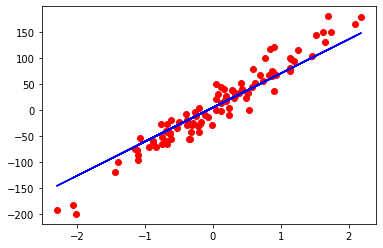

In [ ]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


# prepare data 
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0],1)
#print(y)
n_samples , n_features = X.shape
input_size = n_features
output_size = 1
learning_rate = 0.01
print(X.shape)
# model 
model = nn.Linear(input_size, output_size)

#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

num_epochs = 100
for epoch in range(num_epochs):
  # predict
  y_pred = model(X)
  # loss 
  loss = criterion(y_pred, y)
  #back propagation
  loss.backward()
  # update weight 
  optimizer.step()
  # empty auto grad
  optimizer.zero_grad()

  if (epoch+1)%10 ==0:
    print(f'epoch:{epoch+1}, loss:{loss.item():4f}')

# plot 
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

Logistic regression

In [ ]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)


class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
      super(LogisticRegression, self).__init__()
      self.linear = nn.Linear(n_input_features, 1)
  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred
model = LogisticRegression(n_features)
# loss and optimzer 
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),learning_rate)
# training loop 
num_epochs = 200
for epoch in range(num_epochs):
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)
  loss.backward()
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%10 ==0:
    print(f'epoch:{epoch+1}, loss ={loss.item():.4f}')

with torch.no_grad():
   y_predicted = model(X_test)
   y_pred_cls = y_predicted.round()
   acc = y_pred_cls.eq(y_test).sum()/float(y_test.shape[0])
   print(f'accuracy ={acc:.4f}')

epoch:10, loss =0.5503
epoch:20, loss =0.4507
epoch:30, loss =0.3861
epoch:40, loss =0.3416
epoch:50, loss =0.3093
epoch:60, loss =0.2849
epoch:70, loss =0.2657
epoch:80, loss =0.2502
epoch:90, loss =0.2374
epoch:100, loss =0.2266
epoch:110, loss =0.2174
epoch:120, loss =0.2093
epoch:130, loss =0.2022
epoch:140, loss =0.1959
epoch:150, loss =0.1902
epoch:160, loss =0.1850
epoch:170, loss =0.1803
epoch:180, loss =0.1760
epoch:190, loss =0.1720
epoch:200, loss =0.1684
accuracy =0.9298


In [ ]:
import torch
import torchvision 
from torch.utils.data import Dataset, DataLoader 
import numpy as np
import math
import pandas as pd
# datset class
class WineDataset(Dataset):
  def __init__(self):
    xy = np.loadtxt('/content/drive/MyDrive/ColabNotebooks/Dataset/wine.csv', delimiter=",", dtype =np.float32,skiprows=1)
    self.x = torch.from_numpy(xy[:,1:])
    self.y = torch.from_numpy(xy[:,[0]])
    self.n_samples = xy.shape[0]
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.n_samples
#instantiate datset class 
dataset = WineDataset()

# load dataset
dataloader = DataLoader(dataset=dataset,batch_size=5, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = dataiter.next()
features, label = data
print(features, label)

num_epochs = 2
total_sample = len(dataset)
n_iteration = math.ceil(total_sample/5)
print(total_sample, n_iteration)


for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    if (i+1)%6 ==0:
      print(f'epoch{epoch+1}/{num_epochs}, step {i+1}/{n_iteration}, inputs{inputs.shape}')




tensor([[1.1650e+01, 1.6700e+00, 2.6200e+00, 2.6000e+01, 8.8000e+01, 1.9200e+00,
         1.6100e+00, 4.0000e-01, 1.3400e+00, 2.6000e+00, 1.3600e+00, 3.2100e+00,
         5.6200e+02],
        [1.2040e+01, 4.3000e+00, 2.3800e+00, 2.2000e+01, 8.0000e+01, 2.1000e+00,
         1.7500e+00, 4.2000e-01, 1.3500e+00, 2.6000e+00, 7.9000e-01, 2.5700e+00,
         5.8000e+02],
        [1.3940e+01, 1.7300e+00, 2.2700e+00, 1.7400e+01, 1.0800e+02, 2.8800e+00,
         3.5400e+00, 3.2000e-01, 2.0800e+00, 8.9000e+00, 1.1200e+00, 3.1000e+00,
         1.2600e+03],
        [1.2850e+01, 1.6000e+00, 2.5200e+00, 1.7800e+01, 9.5000e+01, 2.4800e+00,
         2.3700e+00, 2.6000e-01, 1.4600e+00, 3.9300e+00, 1.0900e+00, 3.6300e+00,
         1.0150e+03],
        [1.3030e+01, 9.0000e-01, 1.7100e+00, 1.6000e+01, 8.6000e+01, 1.9500e+00,
         2.0300e+00, 2.4000e-01, 1.4600e+00, 4.6000e+00, 1.1900e+00, 2.4800e+00,
         3.9200e+02]]) tensor([[2.],
        [2.],
        [1.],
        [1.],
        [2.]])
178 36
e

Transforms 

In [ ]:
import torch
import torchvision 
from torch.utils.data import Dataset, DataLoader 
import numpy as np
import math
import pandas as pd
class WineDataset(Dataset):
  def __init__(self, transform=None):
    xy = np.loadtxt('/content/drive/MyDrive/ColabNotebooks/Dataset/wine.csv', delimiter=",", dtype =np.float32,skiprows=1)
    self.x = xy[:,1:]
    self.y = xy[:,[0]]
    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample 
  def __len__(self):
    return self.n_samples

class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample 
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class Multi:
  def __init__(self,factor):
    self.factor = factor

  def __call__(self, sample):
    input, target = sample 
    input = input *self.factor
    return input, target
  

#instantiate datset class 
dataset = WineDataset(transform=ToTensor())
firstdata = dataset[5]
features, labels = firstdata
print(features, labels)

composed = torchvision.transforms.Compose([ToTensor(), Multi(3)])

#instantiate datset class 
dataset = WineDataset(transform=composed)
firstdata = dataset[5]
features, labels = firstdata
print(features, labels)

tensor([1.4200e+01, 1.7600e+00, 2.4500e+00, 1.5200e+01, 1.1200e+02, 3.2700e+00,
        3.3900e+00, 3.4000e-01, 1.9700e+00, 6.7500e+00, 1.0500e+00, 2.8500e+00,
        1.4500e+03]) tensor([1.])
tensor([4.2600e+01, 5.2800e+00, 7.3500e+00, 4.5600e+01, 3.3600e+02, 9.8100e+00,
        1.0170e+01, 1.0200e+00, 5.9100e+00, 2.0250e+01, 3.1500e+00, 8.5500e+00,
        4.3500e+03]) tensor([1.])


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)


# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)




# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

# define hyperparameters 
learning_rate = 1e-3
batch_size = 64
epochs = 30

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
# optimasation function 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# traing loop 
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      # Compute prediction and loss
      pred = model(X)
      loss = loss_fn(pred, y)

      # Backpropagation
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch % 100 == 0:
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# testing loop 
def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# train the model 
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Using cuda device
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


CNN in pytorch

In [ ]:
from torch.nn.modules.activation import ReLU
from torch.nn.modules.linear import Linear
from torch.nn.modules import flatten
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)


# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

dataiter = iter(train_dataloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
      super(NeuralNetwork, self).__init__()
      self.conv1 = nn.Conv2d(1, 20, 4)
      self.conv2 = nn.Conv2d(20, 15, 4)
      self.fc1 = nn.Linear(15*4*4, 200)
      self.fc2 = nn.Linear(200, 100)
      self.fc3 = nn.Linear(100,10)


    def forward(self, x):
      x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))# first layer
      x = F.max_pool2d(F.relu(self.conv2(x)),2) # second layer 
      x = torch.flatten(x,1) # flatten
      x = F.relu(self.fc1(x)) #fully connected layer
      x = F.relu(self.fc2(x)) #fully connected layer 
      x = F.relu(self.fc3(x)) #fully connected layer
      return x

model = NeuralNetwork().to(device)
print(model)

# define hyperparameters 
learning_rate = 1e-3
batch_size = 64
epochs = 30

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
# optimasation function 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# traing loop 
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      # Compute prediction and loss
      pred = model(X)
      loss = loss_fn(pred, y)

      # Backpropagation
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch % 100 == 0:
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# testing loop 
def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# train the model 
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Using cuda device
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
NeuralNetwork(
  (conv1): Conv2d(1, 20, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(20, 15, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=240, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)
Epoch 1
-------------------------------
loss: 2.302636  [    0/60000]
loss: 2.301915  [ 6400/60000]
loss: 2.299515  [12800/60000]
loss: 2.297239  [19200/60000]
loss: 2.308193  [25600/60000]
loss: 2.302568  [32000/60000]
loss: 2.299686  [38400/60000]
loss: 2.300413  [44800/60000]
loss: 2.296213  [51200/60000]
loss: 2.302828  [57600/60000]
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.299805 

Epoch 2
-------------------------------
loss: 2.299209  [    0/60000]
loss: 2.299528  [ 6400/60000]
loss: 2.296225  [12800/60000]
loss: 2.294304  [19200/60000]
loss: 2.305394  [25600/60000]
loss: 2.2

In [ ]:
import torchvision.transforms as transforms

TypeError: ignored